<a href="https://colab.research.google.com/github/lubaochuan/ml_python/blob/main/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding the Perceptron

This document covers the **origin of the perceptron, how it works, why it is (and is not) universal**, with **concrete training examples** for **AND, OR, NAND**, and a **clear demonstration of its limitation (XOR)**.
Reflection and review questions are included to solidify understanding.

## Goals
* Explain the **origin** of the perceptron
* Describe **how a perceptron computes outputs**
* Train a perceptron to model **AND, OR, NAND** logic
* Understand **why a single perceptron is limited**
* Explain why the perceptron is **not universal** on its own

## 1. Where Did the Perceptron Come From?

The **perceptron** was introduced in **1957 by Frank Rosenblatt** as a simplified <mark>mathematical model</mark> of a biological neuron.

* Inputs represent signals from other neurons
* Weights represent synaptic strength
* The output is a binary decision (fire or not)

The perceptron was one of the **<mark>first</mark> learning algorithms** and helped shape modern neural networks.

However, early excitement faded after it was shown that perceptrons could **not learn certain functions**, such as XOR.


## 2. The Perceptron Model

A perceptron computes:

$$
z = w_1 x_1 + w_2 x_2 + b
$$

Then applies a **step function**:

$$
\text{output} =
\begin{cases}
1 & \text{if } z \ge 0\\
0 & \text{otherwise}
\end{cases}
$$

## 3. Implementing a Perceptron from Scratch

In [16]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=10):
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.epochs):
            for xi, target in zip(X, y):
                prediction = self.predict(xi)
                error = target - prediction
                self.weights += self.lr * error * xi
                self.bias += self.lr * error

    def predict(self, x):
        return 1 if np.dot(x, self.weights) + self.bias >= 0 else 0

**Annotation:**

The `Perceptron` class is a fundamental building block of neural networks. Here's a breakdown:

*   **`__init__(self, learning_rate=0.1, epochs=10)`**: This is the constructor. It initializes the perceptron with a `learning_rate` (how much to adjust weights each step) and `epochs` (how many times to iterate over the entire dataset during training).
*   **`fit(self, X, y)`**: This method trains the perceptron.
    *   It <mark>initializes</mark> `weights` to zeros and `bias` to zero. Specifically, `self.weights = np.zeros(X.shape[1])` initializes the weights to an array of zeros, with a size corresponding to the number of input features (`X.shape[1]`).
    *   It then loops for a specified number of `epochs`. Inside each epoch, it iterates through each input `xi` and its corresponding `target` output.
    *   For each input, it `predicts` an output. If the prediction is wrong (error is not zero), it adjusts the `weights` and `bias` proportionally to the `error` and the `learning_rate`.
*   **`predict(self, x)`**: This method takes an input `x` and makes a prediction.
    *   It calculates the weighted sum of inputs plus the bias (`np.dot(x, self.weights) + self.bias`).
    *   It then applies a step function: if the sum is greater than or equal to zero, it outputs `1`; otherwise, it outputs `0`.

In a perceptron, the **bias** acts like an **intercept** in a linear equation, or a threshold that needs to be met for the neuron to activate.

* **Shifts the Decision Boundary:** Without a bias, the decision boundary (the line or **hyperplane** separating the classes) must pass through the origin (0,0). The bias allows the decision boundary to be shifted up or down, or left or right on a graph, independent of the input values. This greatly increases the model's **flexibility** to fit different datasets.

* **Controls Activation Threshold:** It effectively determines the baseline activation level. A positive bias means the neuron is more likely to activate, even with small or zero inputs. A negative bias means it requires **stronger** positive input signals to activate.

The `learning_rate` (represented as `self.lr` in the `Perceptron` class) plays a crucial role in the training process, specifically in how the perceptron adjusts its `weights` and `bias` after making a prediction.

Its primary role is to control the **step size** or **magnitude** of the updates made to the perceptron's parameters (`weights` and `bias`) during training. Here's a breakdown:

*   **During Training (`fit` method):** When the perceptron makes a prediction that is different from the actual `target` value, an `error` is calculated (`target - prediction`). This `error` indicates how far off the prediction was.

*   **Parameter Updates:** The `learning_rate` is then multiplied by this `error` and the input `xi` (for weights) or just the `error` (for bias) to determine how much the `weights` and `bias` should be adjusted. The update rules are:
    *   `self.weights += self.lr * error * xi`
    *   `self.bias += self.lr * error`

*   **Impact of `learning_rate` value:**
    *   **Large `learning_rate`:** If `self.lr` is too large, the perceptron will make very big adjustments to its `weights` and `bias` with each error. This can cause it to **overshoot** the optimal solution, potentially leading to **oscillations** or even **divergence** where the model never converges to a stable state that correctly classifies the data.
    *   **Small `learning_rate`:** If `self.lr` is too small, the perceptron will make tiny adjustments. While this ensures more precise steps and might lead to convergence, it can make the training process very **slow** and computationally expensive, requiring many more `epochs` to learn the patterns.

The `learning_rate` is a **<mark>hyperparameter</mark>** that needs to be carefully chosen. A well-tuned `learning_rate` allows the perceptron to efficiently converge to a solution where it correctly classifies the training data by finding an appropriate decision boundary.

**Parameters** are variables that are internal to the model and whose values are learned or estimated from the data during the training process. They are optimized by the learning algorithm (like the perceptron's fit method). In the Perceptron class, `self.weights` and `self.bias` are both adjusted iteratively during the fit method based on the `error` and `learning_rate`.

**Hyperparameters**, on the other hand, are external configuration settings for the model, whose values are set before the training process begins. They are not learned from the data itself. Examples include the `learning_rate` and `epochs` in our Perceptron class.

## 4. Training the Perceptron: AND Gate

The AND gate outputs `1` **only if both inputs are 1**.

| x₁ | x₂ | AND |
| -- | -- | --- |
| 0  | 0  | 0   |
| 0  | 1  | 0   |
| 1  | 0  | 0   |
| 1  | 1  | 1   |


In [ ]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y_and = np.array([0,0,0,1])

p_and = Perceptron()
p_and.fit(X, y_and)

for x in X:
    print(x, "->", p_and.predict(x))

[0 0] -> 0
[0 1] -> 0
[1 0] -> 0
[1 1] -> 1


## 5. Training the Perceptron: OR Gate

The OR gate outputs `1` if **at least one input is 1**.

In [ ]:
y_or = np.array([0,1,1,1])

p_or = Perceptron()
p_or.fit(X, y_or)

for x in X:
    print(x, "->", p_or.predict(x))

[0 0] -> 0
[0 1] -> 1
[1 0] -> 1
[1 1] -> 1


## 6. Training the Perceptron: NAND Gate

NAND is the **negation of AND** and is especially important in computer architecture.

| x₁ | x₂ | NAND |
| -- | -- | ---- |
| 0  | 0  | 1    |
| 0  | 1  | 1    |
| 1  | 0  | 1    |
| 1  | 1  | 0    |


In [ ]:
y_nand = np.array([1,1,1,0])

p_nand = Perceptron()
p_nand.fit(X, y_nand)

for x in X:
    print(x, "->", p_nand.predict(x))

[0 0] -> 1
[0 1] -> 1
[1 0] -> 1
[1 1] -> 0


## 7. Why These Work: Linear Separability
AND, OR, and NAND are **linearly separable**.

This means:

* You can draw a **single straight line** that separates outputs `0` and `1`
* A perceptron is essentially <mark>learning</mark> that line

In [11]:
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )

    Z = np.array([
        model.predict(np.array([x1, x2]))
        for x1, x2 in zip(xx.ravel(), yy.ravel())
    ])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel("x₁")
    plt.ylabel("x₂")
    plt.title(title)
    plt.show()

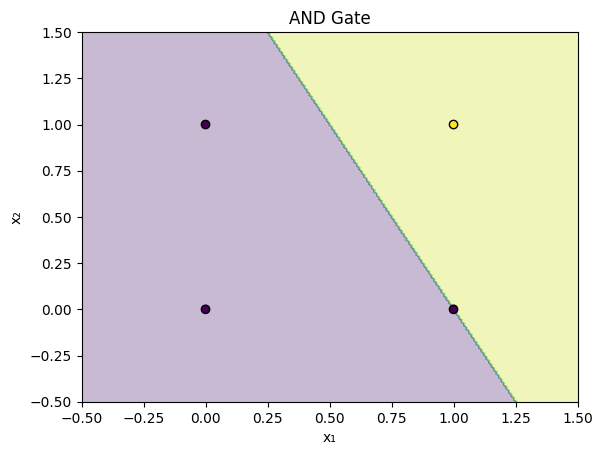

In [12]:
plot_decision_boundary(p_and, X, y_and, "AND Gate")

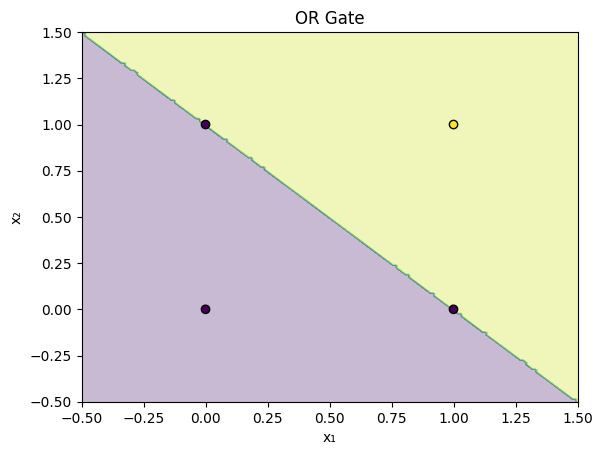

In [13]:
plot_decision_boundary(p_or, X, y_and, "OR Gate")

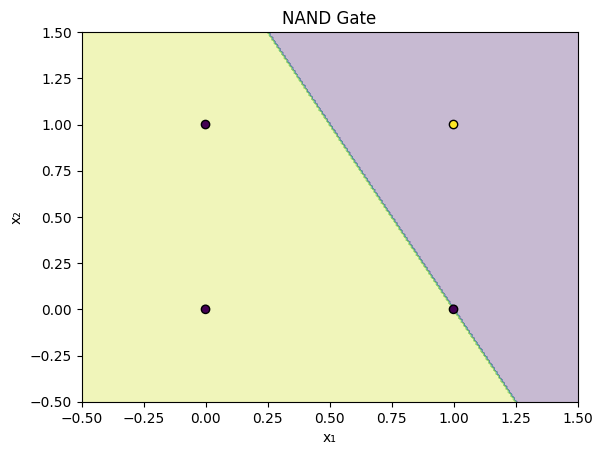

In [14]:
plot_decision_boundary(p_nand, X, y_and, "NAND Gate")

## 8. The Limit of the Perceptron: XOR

The XOR gate outputs `1` when **inputs are different**.

| x₁ | x₂ | XOR |
| -- | -- | --- |
| 0  | 0  | 0   |
| 0  | 1  | 1   |
| 1  | 0  | 1   |
| 1  | 1  | 0   |

There is **no single line** that separates these outputs.

In [17]:
y_xor = np.array([0,1,1,0])

p_xor = Perceptron()
p_xor.fit(X, y_xor)

for x in X:
    print(x, "->", p_xor.predict(x))

[0 0] -> 1
[0 1] -> 1
[1 0] -> 0
[1 1] -> 0


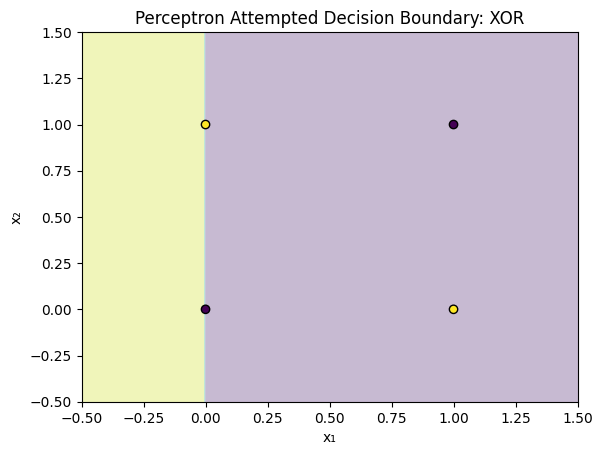

In [18]:
plot_decision_boundary(p_xor, X, y_xor, "Perceptron Attempted Decision Boundary: XOR")


A single perceptron:

* Can learn **linearly separable** functions
* Cannot learn **XOR**
* Cannot represent complex decision boundaries

This limitation led to:

* Multi-layer neural networks
* Non-linear activation functions
* Backpropagation

## 9. Reflection Questions

1. Why can AND, OR, and NAND be learned by a perceptron, but XOR cannot?
2. What mathematical operation does a perceptron perform before activation?
3. What does “linear separability” mean geometrically?
4. What role does the bias play?
5. What happens if the learning rate is too large?
6. Why is the step function non-differentiable?
7. How does this model relate to modern neural networks?
8. Why was the limitation of the perceptron historically important?
9. Why is NAND especially significant in computing?
10. How does adding hidden layers overcome the perceptron’s limitation?


<details>
  <summary>Click to see answers</summary>

1.  **Why can AND, OR, and NAND be learned by a perceptron, but XOR cannot?**
    *   AND, OR, and NAND gates are **linearly separable**, meaning a single straight line (or hyperplane in higher dimensions) can separate their `0` and `1` outputs. A perceptron learns to find this decision boundary.
    *   XOR, however, is **not linearly separable**. There is no single straight line that can separate its `0` outputs (`[0,0]`, `[1,1]`) from its `1` outputs (`[0,1]`, `[1,0]`). This is why a single perceptron fails to learn it.

2.  **What mathematical operation does a perceptron perform before activation?**
    *  A perceptron computes a **weighted sum of its inputs plus a bias**: $$ z = w_1 x_1 + w_2 x_2 + b $$ before applying the step function (activation).

3.  **What does “linear separability” mean geometrically?**
    * Geometrically, linear separability means that a dataset (like the input points for a logic gate) can be divided into two classes by a **single straight line** (for 2D data) or a **hyperplane** (for higher-dimensional data). All points belonging to one class lie on one side of the line/hyperplane, and all points belonging to the other class lie on the opposite side.

4.  **What role does the bias play?**
    *   The bias acts like an **intercept** in a linear equation. It allows the perceptron's decision boundary to be **shifted** up, down, left, or right, independent of the input values. This increases the model's flexibility to fit different datasets and effectively determines the baseline activation threshold for the neuron.

5.  **What happens if the learning rate is too large?**
    *   (Not explicitly covered in the provided notebook content.) Generally, if the learning rate is too large, the perceptron's weights and bias might **overshoot** the optimal values during updates, leading to **oscillations** or **failure to converge** to a stable solution.
    * Understanding the role of fundamental components like <mark>bias</mark> and the implications of hyperparameter choices (e.g., <mark>learning rate</mark>) in simple models like the perceptron provides a strong foundation for comprehending more complex neural networks.

6.  **Why is the step function non-differentiable?**
    *   (Not explicitly covered in the provided notebook content.) The step function is non-differentiable because it has an abrupt jump (a discontinuity) at the threshold (typically at 0). At this point, the slope is undefined, and for all other points, the slope is 0. This lack of a defined derivative at the threshold makes it unsuitable for gradient-based optimization methods that rely on backpropagation.

7.  **How does this model relate to modern neural networks?**
    *   The perceptron is considered one of the **first learning algorithms** and a fundamental building block. Modern neural networks are essentially **multi-layer perceptrons** that stack multiple perceptron-like units (neurons) and often use **non-linear activation functions** (instead of a simple step function) and more sophisticated training algorithms like **backpropagation** to overcome the limitations of a single perceptron.

8.  **Why was the limitation of the perceptron historically important?**
    *   The perceptron's inability to learn non-linearly separable functions like XOR led to a period known as the "AI winter" for neural networks. This limitation highlighted the need for more complex architectures (like multi-layer networks) and training methods, ultimately pushing research towards the development of modern deep learning.

9.  **Why is NAND especially significant in computing?**
    *   NAND is significant because it is a **universal logic gate**. This means that any other Boolean function (AND, OR, NOT, XOR, etc.) can be constructed solely by combining multiple NAND gates. This property makes it fundamental in digital circuit design and computer architecture.

10. **How does adding hidden layers overcome the perceptron’s limitation?**
    *   Adding hidden layers allows a neural network to learn **non-linear combinations** of the input features. Each neuron in a hidden layer can learn to detect a different feature or pattern, and by combining these patterns, the network can create **complex, non-linear decision boundaries** that a single perceptron cannot. This hierarchical processing allows multi-layer networks to solve problems like XOR that are not linearly separable in the original input space.

</details>